In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v2.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,idle_power,active_power,files,Unnamed: 17
0,3,datacenter,75010.809264,1,storage,900000.0,20992.0,106.078447,1.000013659472681:,615.254992,3.000041,0.003,0.004,198.0,3.0,5.8,"55596,3072,15.520749003096359:1-269738,1024,5....",NaN
1,3,datacenter,75010.809264,2,storage,900000.0,24064.0,121.605013,1.0000000435601588:,705.309073,3.000000,0.003,0.004,198.0,3.0,5.8,"304608,3584,18.103752520403432:361644,3072,15....",NaN
2,3,datacenter,75010.809264,3,storage,900000.0,27136.0,152.628102,1.000000126982307:,885.242992,3.000000,0.003,0.004,198.0,3.0,5.8,"305050,3584,18.10795200666362:303723,3584,18.1...",NaN
3,3,datacenter,75010.809264,4,storage,900000.0,21504.0,108.669959,1.0000002596075253:,630.285760,3.000001,0.003,0.004,198.0,3.0,5.8,"29-240840,3072,15.522980568943678:1-270738,102...",NaN
4,3,datacenter,75010.809264,5,storage,900000.0,17920.0,106.092757,1.0000005200268733:,615.337989,3.000002,0.003,0.004,198.0,3.0,5.8,"289404,512,2.5953087119314207:4-760114,512,2.5...",NaN


## Energy Consumption

#### Maximum Energy consumption of persistent storage

The datacenter 'datacenter' current persistent storage infrastructure at max can consume 580.0000000000001 Joules (J).


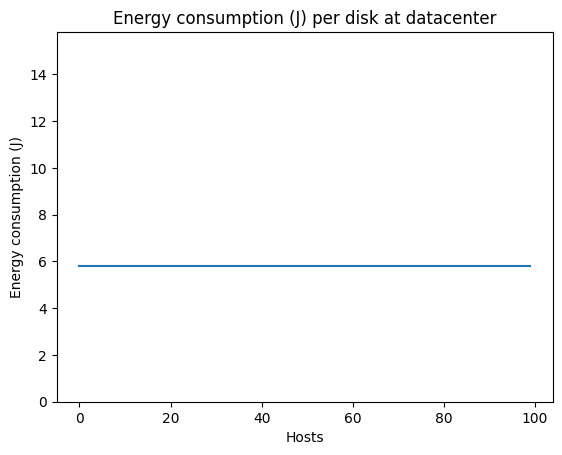

The cloud providers current computing infrastructure at max can consume 580.0000000000001 Joules (J).


In [4]:
labels = np.unique(dataset['datacenter_name'])
max_power = 0
max_power_per_disk = np.array([])

max_power_consumed = 0
max_power_consumed_per_disk = np.array([])

duration_per_disk = np.array([])

for i in range(len(labels)):
    max_power_per_datacenter = 0
    max_power_per_disk_per_datacenter = np.array([])
    
    max_power_consumed_per_datacenter = 0
    max_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        idle_duration = 0
        for idle_interval in sample['idle_intervals'].split(":"):
            if idle_interval != '':
                idle_duration += float(idle_interval)
                
        active_power = float(sample['active_power'])
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        max_consumed_active_power = float(sample['active_duration']) * (float(sample['active_power']) + idle_duration)
        consumed_idle_power = idle_duration * float(sample['idle_power'])
        max_power_per_datacenter += active_power
        max_power_per_disk = np.append(max_power_per_disk, active_power)
        max_power_per_disk_per_datacenter = np.append(max_power_per_disk_per_datacenter, active_power)
        
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(max_power_per_datacenter * 1)} Joules (J) per second.
          With the power consume d")
    max_power += max_power_per_datacenter
    plt.plot(np.arange(0, len(max_power_per_disk_per_datacenter)), (max_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(max_power_per_disk_per_datacenter)+10))
    plt.xlabel("Hosts")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(max_power * 1)} Joules (J) per second.")

#### Current power consumption of persisten storage

#### Minimum power consumption of persistent storage